# Leistungsnachweis – Analyse das zweiten Datensatzes
# Geschlechterunterschiede beim Sprechen über psychische Probleme: Ein internationaler Vergleich (2020)
- Gruppe: Lercara Sofia, Ramadan Aya, Tresch Carolina 

Psychische Gesundheit spielt weltweit eine wichtige Rolle, wird jedoch in verschiedenen Ländern und Kulturen unterschiedlich thematisiert. Besonders beim Sprechen über Angststörungen und Depressionen zeigen sich Unterschiede zwischen Männern und Frauen.



## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Geschlechterunterschiede beim Sprechen über psychische Probleme: Ein internationaler Vergleich (2020)
### 1.2 Fragestellung:
- Wie variieren Geschlechterunterschiede im Sprech-Unbehagen über psychische Gesundheit zwischen Länder und Weltregionen, und welche Rolle spielen dabei Einkommen und Kultur?
### 1.3 Datenquellen:

- https://ourworldindata.org

- https://healthdata.gov/

- https://ourworldindata.org/grapher/discomfort-speaking-anxiety-depression-by-gender

- https://www.sciencedirect.com/org/science/article/pii/S1462373022000396

- https://myhixel.com/blogs/sexuality-and-wellbeing/mental-health-in-men-vs-women-the-differences-we-need-to-understand

- https://pmc.ncbi.nlm.nih.gov/articles/PMC8806009/


### 1.4 Daten beschaffen und laden

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

df_2020 = df[df["Year"] == 2020]




df_2020.head()


# Erklärung der Variablen 
# Entity: Name des Landes
# Code: ISO-Ländercode
# Year: Jahr der Datenerhebung

# Share ... Gender: male:
# Anteil (%) der Männer, die sich nicht wohl fühlen,
# über Angst oder Depression zu sprechen

# Share ... Gender: female:
# Anteil (%) der Frauen, die sich nicht wohl fühlen,
# über Angst oder Depression zu sprechen

# Population: Bevölkerung des Landes
# World region according to OWID: Zugehörige Weltregion


,Entity,Code,Year,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all,Population,World region according to OWID
257,Afghanistan,AFG,2020,NaN,NaN,3.906898e+07,NaN
338,Africa,NaN,2020,27.313850,25.934032,1.380821e+09,NaN
746,Africa (UN),NaN,2020,NaN,NaN,1.380821e+09,NaN
831,Albania,ALB,2020,26.787529,28.347052,2.871950e+06,NaN
1169,Algeria,DZA,2020,13.632193,9.124729,4.404209e+07,NaN


## 2. Daten vorbereiten 
Der Datensatz liegt im Wide-Format vor, da die Anteile für Männer und Frauen in getrennten Spalten gespeichert sind und jede Zeile ein Land in einem bestimmten Jahr beschreibt. Für direkte Vergleiche zwischen Männern und Frauen sowie zwischen Ländern und Weltregionen wird dieses Format verwendet. Eine Umwandlung in ein Long-Format wäre sinnvoll, falls das Geschlecht als eigene Variable analysiert oder gruppiert werden soll.

Der Datensatz enthält sowohl kategoriale Variablen (Land, Weltregion, Geschlecht) als auch numerische Variablen (Jahr, Prozentwerte der Befragten, Bevölkerung). Fehlende Werte treten auf, wenn für bestimmte Länder oder Jahre keine Daten verfügbar sind.

In [8]:

# Erste Zeilen anzeigen
df_2020.head()


male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"


df_random = df[["Entity", male_col, female_col]].dropna().sample(5, random_state=42)

df_random.style.hide(axis="index")


Entity,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all
Canada,34.832066,25.583342
Hong Kong,45.868176,59.001286
India,17.763678,15.467589
Poland,37.076504,33.448235
Asia,25.107258,28.115084


## 3. Statistik der Rohdaten (Analyse im Long-Format)


Die Prozentwerte im Datensatz sind kontinuierliche Daten, da sie Werte zwischen 0 und 100 annehmen können. 
Angaben wie Land, Weltregion und Geschlecht sind diskrete Daten, da sie aus festen Kategorien bestehen.



In [11]:
df_2020.dtypes.reset_index() \
    .rename(columns={"index": "Spalte", 0: "Datentyp"}) \
    .style.hide(axis="index")


Spalte,Datentyp
Entity,object
Code,object
Year,int64
Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all,float64
Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all,float64
Population,float64
World region according to OWID,object


In [ ]:
len(df)
#es ist nach Jahr 2020 filteriert

257

In [14]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Long-Format
df_long = df.melt(
    id_vars=["Entity", "World region according to OWID"],
    value_vars=[male_col, female_col],
    var_name="Gender",
    value_name="Share_not_comfortable"
)

df_long["Gender"] = df_long["Gender"].apply(
    lambda x: "Male" if "male" in x.lower() else "Female"
)

df_long.head(5).style.hide(axis="index")


Entity,World region according to OWID,Gender,Share_not_comfortable
Afghanistan,nan,Male,nan
Africa,nan,Male,27.313850
Africa (UN),nan,Male,nan
Albania,nan,Male,26.787529
Algeria,nan,Male,13.632193


In [15]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Auf Jahr 2020 filtern
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Tabelle: Anzahl Datenpunkte und fehlende Werte
summary = pd.DataFrame({
    "Anzahl_Datenpunkte": df[[male_col, female_col]].count(),
    "Fehlende_Werte": df[[male_col, female_col]].isna().sum()
})

summary.style.hide(axis="index")


Anzahl_Datenpunkte,Fehlende_Werte
123,134
123,134


Die Werte werden getrennt für Männer und Frauen gezählt, deshalb erscheinen sie zweimal.

### 3.1 Verteilung der Anteile nach Geschlecht (Durchschnitt 2020)

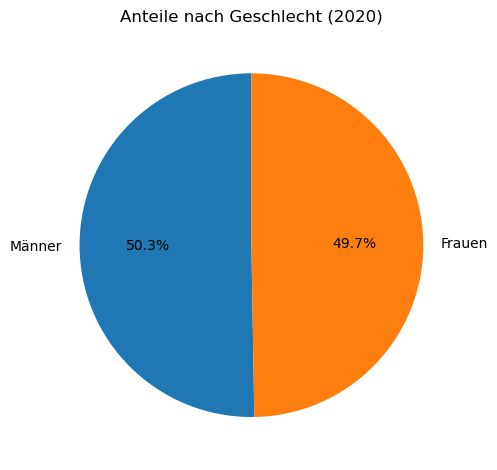

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Durchschnittswerte berechnen
mean_male = df[male_col].mean()
mean_female = df[female_col].mean()

# Kreisdiagramm
plt.figure()
plt.pie(
    [mean_male, mean_female],
    labels=["Männer", "Frauen"],
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Anteile nach Geschlecht (2020)")
plt.tight_layout()
plt.show()


### 3.2 Datenverfügbarkeit nach Ländern im Jahr 2020

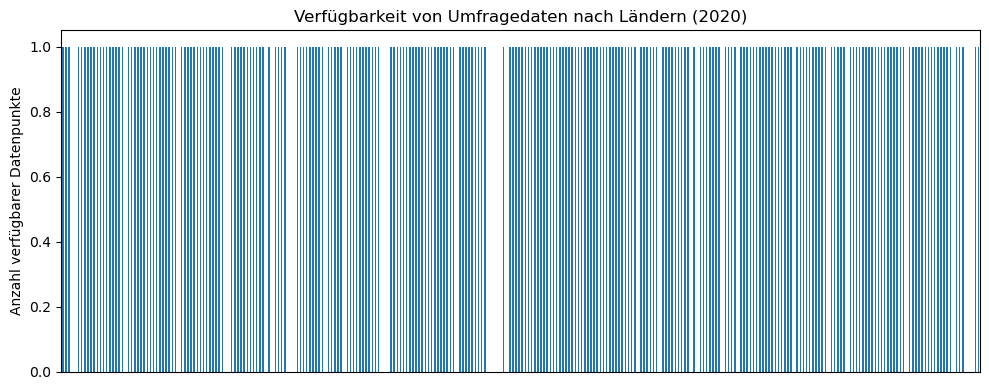

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Alle Länder im Datensatz
all_countries = df["Entity"].dropna().unique()

# Nur Jahr 2020
df_2020 = df[df["Year"] == 2020]

# Anzahl verfügbarer Datenpunkte pro Land
counts_2020 = df_2020["Entity"].value_counts()


counts_all = pd.Series(counts_2020, index=all_countries).fillna(0)

# Diagramm
plt.figure(figsize=(10, 4))
counts_all.plot(kind="bar")

plt.ylabel("Anzahl verfügbarer Datenpunkte")
plt.title("Verfügbarkeit von Umfragedaten nach Ländern (2020)")
plt.xticks([])  # keine Ländernamen
plt.tight_layout()
plt.show()


Das Diagramm zeigt, für welche Länder im Jahr 2020 Umfragedaten im Datensatz verfügbar sind. Jeder Balken repräsentiert ein Land, für das mindestens ein Datenpunkt vorliegt. Länder ohne Balken weisen keine verfügbaren Daten für dieses Jahr auf. Da pro Land und Jahr jeweils nur ein Eintrag vorhanden ist, sind alle Balken gleich hoch.

### 3.3 Anteile nach Geschlecht in allen Ländern (2020)

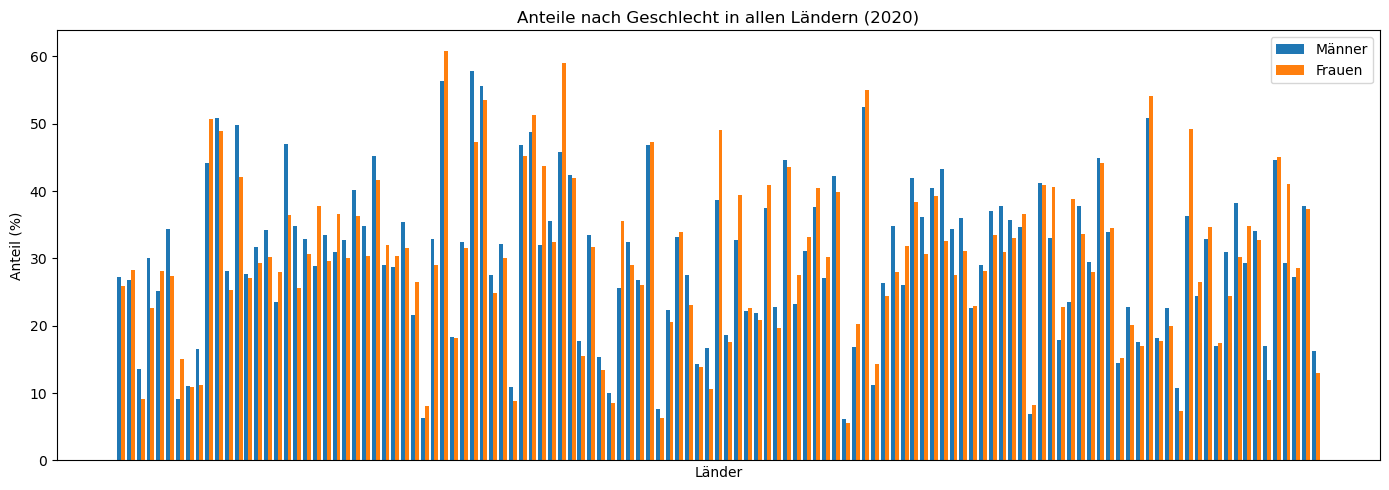

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"


df_plot = df.dropna(subset=[male_col, female_col])


df_plot = df_plot.sort_values("Entity")


x = range(len(df_plot))
width = 0.4

plt.figure(figsize=(14, 5))
plt.bar([i - width/2 for i in x], df_plot[male_col], width=width, label="Männer")
plt.bar([i + width/2 for i in x], df_plot[female_col], width=width, label="Frauen")

plt.xticks([])  
plt.xlabel("Länder")
plt.ylabel("Anteil (%)")
plt.title("Anteile nach Geschlecht in allen Ländern (2020)")
plt.legend()
plt.tight_layout()
plt.show()


## 4. Analyse 

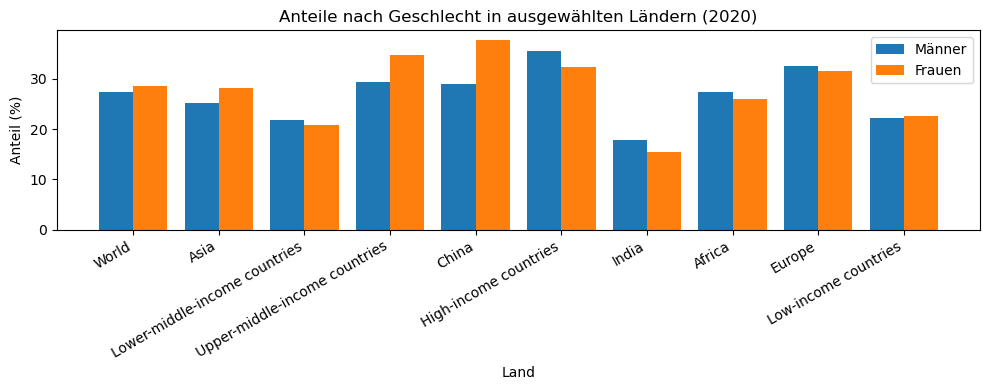

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"


df_plot = (
    df.dropna(subset=[male_col, female_col])
      .sort_values("Population", ascending=False)
      .head(10)
)


x = range(len(df_plot))
width = 0.4

plt.figure(figsize=(10, 4))
plt.bar([i - width/2 for i in x], df_plot[male_col], width=width, label="Männer")
plt.bar([i + width/2 for i in x], df_plot[female_col], width=width, label="Frauen")

plt.xticks(list(x), df_plot["Entity"], rotation=30, ha="right")
plt.xlabel("Land")
plt.ylabel("Anteil (%)")
plt.title("Anteile nach Geschlecht in ausgewählten Ländern (2020)")
plt.legend()
plt.tight_layout()
plt.show()



### Berechnungen 

In [20]:
import pandas as pd


df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"


groups = [
    "World", "Asia", "Africa", "Europe",
    "China", "India",
    "High-income countries",
    "Upper-middle-income countries",
    "Lower-middle-income countries",
    "Low-income countries"
]

# Differenz berechnen: Frauen − Männer
df_diff = (
    df[df["Entity"].isin(groups)]
    .dropna(subset=[male_col, female_col])
    .assign(**{"Differenz (Frauen − Männer)": lambda x: x[female_col] - x[male_col]})
    [["Entity", "Differenz (Frauen − Männer)"]]
    .reset_index(drop=True)
)


df_diff.style.hide(axis="index")


Entity,Differenz (Frauen − Männer)
Africa,-1.379818
Asia,3.007826
China,8.867273
Europe,-0.908142
High-income countries,-3.131640
India,-2.296089
Low-income countries,0.473097
Lower-middle-income countries,-1.062481
Upper-middle-income countries,5.444269
World,1.219054


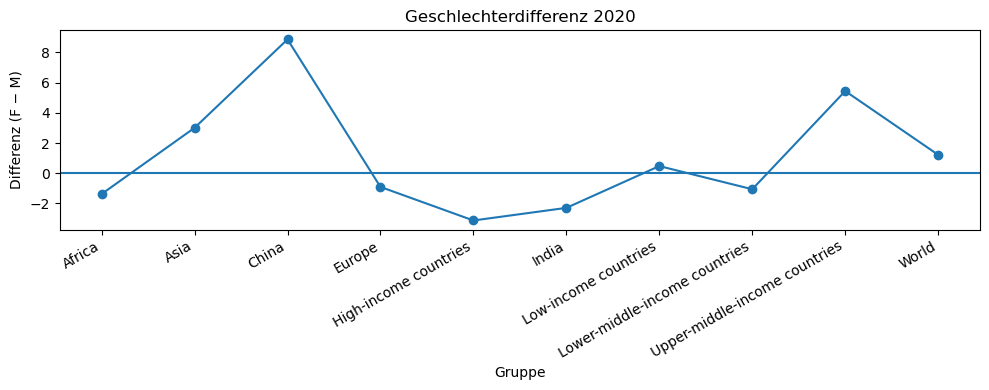

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

groups = [
    "World", "Asia", "Africa", "Europe",
    "China", "India",
    "High-income countries",
    "Upper-middle-income countries",
    "Lower-middle-income countries",
    "Low-income countries"
]

# Differenz berechnen
df_diff = (
    df[df["Entity"].isin(groups)]
    .dropna(subset=[male_col, female_col])
    .assign(Differenz=lambda x: x[female_col] - x[male_col])
    .reset_index(drop=True)
)

# Liniendiagramm
plt.figure(figsize=(10, 4))
plt.plot(df_diff["Entity"], df_diff["Differenz"], marker="o")
plt.axhline(0)

plt.xlabel("Gruppe")
plt.ylabel("Differenz (F − M)")
plt.title("Geschlechterdifferenz 2020")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()




### Beobachtungen 

Die Diagramme zeigen die Anteile von Männern und Frauen, die sich im Jahr 2020 nicht wohl dabei fühlen, über Angst oder Depression zu sprechen. Insgesamt lässt sich zunächst feststellen, dass sich die globalen Durchschnittswerte von Männern und Frauen nur gering unterscheiden (siehe 3.1 " Verteilung der Anteile nach Geschlecht (Durchschnitt 2020)"). Das Kreisdiagramm verdeutlicht, dass die weltweiten Anteile nahezu ausgeglichen sind, was darauf hindeutet, dass das Thema mentale Gesundheit grundsätzlich beide Geschlechter betrifft.

Bei der Betrachtung aller Länder zeigt sich jedoch eine starke Streuung der Werte. In einigen Ländern liegen die Anteile der Frauen deutlich über denen der Männer, während in anderen Ländern Männer höhere Werte aufweisen. Es gibt zudem Länder, in denen die Unterschiede sehr gering sind. Diese Beobachtung macht deutlich, dass der Geschlechterunterschied nicht einheitlich ist, sondern stark vom jeweiligen Land abhängt.

Das Diagramm mit ausgewählten Ländern, Regionen und Einkommensgruppen zeigt klarere Muster. In asiatischen Ländern, insbesondere in China, weisen Frauen deutlich höhere Anteile auf als Männer. In Europa und in Ländern mit hohem Einkommen hingegen liegen die Werte der Männer teilweise leicht über denen der Frauen. In Ländern mit niedrigem oder mittlerem Einkommen sind die Unterschiede oft kleiner oder wechseln die Richtung, sodass kein einheitliches Muster erkennbar ist.

Die Tabelle mit den berechneten Differenzen (Frauen minus Männer) bestätigt diese visuellen Eindrücke quantitativ. Positive Differenzwerte, wie in China oder in Upper-middle-income countries, zeigen, dass Frauen dort deutlich häufiger betroffen sind. Negative Werte, etwa in Europa oder in High-income countries, deuten darauf hin, dass Männer in diesen Gruppen höhere Anteile aufweisen. Das Liniendiagramm der Differenzen macht diese Unterschiede besonders anschaulich, da sowohl Richtung als auch Stärke der Abweichungen sichtbar werden.

### Interpretation 

Die Unterschiede zwischen Männern und Frauen lassen sich nicht durch einen einzelnen Faktor erklären, sondern entstehen durch soziale, kulturelle und wirtschaftliche Einflüsse. In vielen Regionen weisen Frauen höhere Anteile auf, was darauf hindeuten kann, dass sie psychische Belastungen häufiger wahrnehmen oder benennen. Zudem sind Frauen in vielen Gesellschaften mehrfach belastet, etwa durch Arbeit, Familie und soziale Erwartungen.

Auffällig ist zudem, dass die globalen Durchschnittswerte zwischen Männern und Frauen insgesamt relativ ausgeglichen erscheinen. Dies bedeutet jedoch nicht, dass es keine Unterschiede gibt. Vielmehr erklärt sich dieser Ausgleich dadurch, dass bevölkerungsreiche Länder wie China und Indien einen sehr starken Einfluss auf die globalen Mittelwerte haben. In diesen Ländern sind die Anteile bei Frauen teilweise deutlich höher, was regionale Unterschiede auf globaler Ebene nivelliert und zu einem scheinbaren Gleichgewicht zwischen den Geschlechtern führt.

Trotz dieser deutlichen Unterschiede erscheinen die globalen Durchschnittswerte von Männern und Frauen relativ ausgeglichen. Dies liegt vor allem daran, dass bevölkerungsreiche Länder wie China und Indien einen starken Einfluss auf die globalen Werte haben. Hohe Frauenanteile in diesen Ländern gleichen Unterschiede auf globaler Ebene aus.

Insgesamt zeigen die Ergebnisse, dass Geschlechterunterschiede im Sprech-Unbehagen über psychische Probleme stark vom gesellschaftlichen und wirtschaftlichen Kontext abhängen. Einkommensniveau, kulturelle Normen und Bevölkerungsgrösse spielen dabei eine wichtige Rolle.

## 5. Fazit 
Zusammenfassend zeigen die Ergebnisse, dass sich Männer und Frauen weltweit unterschiedlich im Umgang mit psychischen Problemen unterscheiden. Diese Unterschiede variieren je nach Region und Einkommensniveau deutlich. Kulturelle Normen und soziale Rollen spielen dabei eine zentrale Rolle. Die Analyse unterstreicht die Bedeutung des gesellschaftlichen Kontexts für mentale Gesundheit.